In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange as rrange, random

# Sierpinski Triangle

In [2]:
def randP(poly):
    return poly[rrange(0,len(poly))]

def halfstep(p1, p2):
    return (p1 + p2) / 2.0

def nthstep(p1, p2, n):
    return (p1 + p2) / float(n)

def genPoints(poly, iterations, nth_part=2.0):
    p = np.array([0.0, 0.0])
    steps = []
    for i in range(iterations):
        p = nthstep(p, randP(poly), nth_part)
        steps.append(p)
    return np.array(steps)

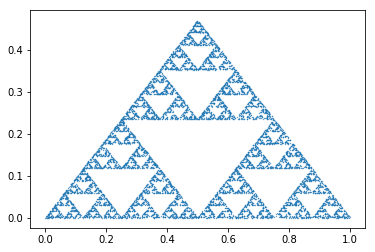

In [14]:
triangle = np.array([[0.0, 0.0], [0.5, 0.47], [1.0, 0.0]])
sierpinsky = genPoints(triangle, 10000)

X = sierpinsky[:,0]
Y = sierpinsky[:,1]

plt.scatter(X, Y, s=0.1)
plt.show()

In [81]:
def barnsley_transforms(point, case):
    if case == 0:
        return np.array([[0.0, 0.0], [0.0, 0.16]]).dot(point)
    if case == 1:
        return np.array([[0.85, 0.04], [-0.04, 0.85]]).dot(point) + np.array([0.0, 1.6])
    if case == 2:
        return np.array([[0.2, -0.26], [0.23, 0.22]]).dot(point) + np.array([0.0, 1.6])
    if case == 3:
        return np.array([[-0.15, 0.28], [0.26, 0.24]]).dot(point) + np.array([0.0, 0.44])
    
def rand_transform(p):
    r = random()
    if r < 0.01:
        return barnsley_transforms(p, 0)
    if r < 0.86:
        return barnsley_transforms(p, 1)
    if r < 0.93:
        return barnsley_transforms(p, 2)
    
    return barnsley_transforms(p, 3)


def gen_fern(iterations):
    p = np.array([0.0, 0.0])
    steps = []
    for i in range(iterations):
        p = rand_transform(p)
        steps.append(p)
    return np.array(steps)

# Barnsley Fern

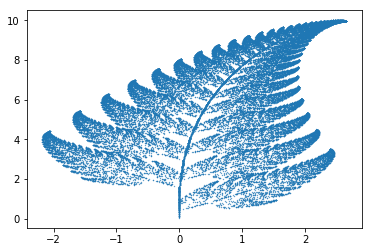

In [86]:
barnsley_fern = gen_fern(50000)

X2 = barnsley_fern[:, 0]
Y2 = barnsley_fern[:, 1]

plt.scatter(X2, Y2, s=0.1)
plt.show()